In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

In [27]:
df = pd.read_csv('C:/Users/Gerard/Desktop/documents/movies.csv')
df.drop_duplicates(subset=['name', 'year', 'released'], inplace=True)
df['released'] = df['released'].str.replace(r'\s*\(.*\)', '', regex=True)
df['released'] = pd.to_datetime(df['released'], format='mixed')
df.drop('year', axis=1, inplace=True)
df.insert(loc=3, column="year", value=df["released"].astype(str).str[:4])
df["budget"] = df["budget"].fillna(0)
df["budget"] = df["budget"].astype(int)
df['gross'] = df['gross'].fillna(0)
df['gross'] = df['gross'].astype(float)
df['votes'] = df['votes'].fillna(0)
df['votes'] = df['votes'].astype(int)
df["runtime"] = df["runtime"].fillna(0)
df["runtime"] = df["runtime"].astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98


In [3]:
df.shape

(7668, 15)

In [5]:
#Cleaning the Data:
#easier syntax to count all the null values in each column of your DataFrame:
null_counts = df.isnull().sum()
null_counts

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [6]:
#Data Types for your columns:
df.dtypes

name                object
rating              object
genre               object
year                object
released    datetime64[ns]
score              float64
votes                int32
director            object
writer              object
star                object
country             object
budget               int32
gross              float64
company             object
runtime              int32
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7668 non-null   object        
 1   rating    7591 non-null   object        
 2   genre     7668 non-null   object        
 3   year      7668 non-null   object        
 4   released  7666 non-null   datetime64[ns]
 5   score     7665 non-null   float64       
 6   votes     7668 non-null   int32         
 7   director  7668 non-null   object        
 8   writer    7665 non-null   object        
 9   star      7667 non-null   object        
 10  country   7665 non-null   object        
 11  budget    7668 non-null   int32         
 12  gross     7668 non-null   float64       
 13  company   7651 non-null   object        
 14  runtime   7668 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(9)
memory usage: 808.9+ KB


In [8]:
df.nunique()

name        7512
rating        12
genre         19
year          42
released    2944
score         72
votes        937
director    2949
writer      4535
star        2814
country       59
budget       414
gross       7473
company     2385
runtime      139
dtype: int64

In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1990,1990-01-26,4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,1989-04-14,5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0.000000e+00,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,1989-04-07,6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0.000000e+00,Trans World Entertainment (TWE),89
1601,My Twentieth Century,NaN,Comedy,1990,1990-01-13,7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104


In [10]:
df1 = df.sort_values('gross', inplace=False, ascending=False)

In [11]:
# Budget high correlation 

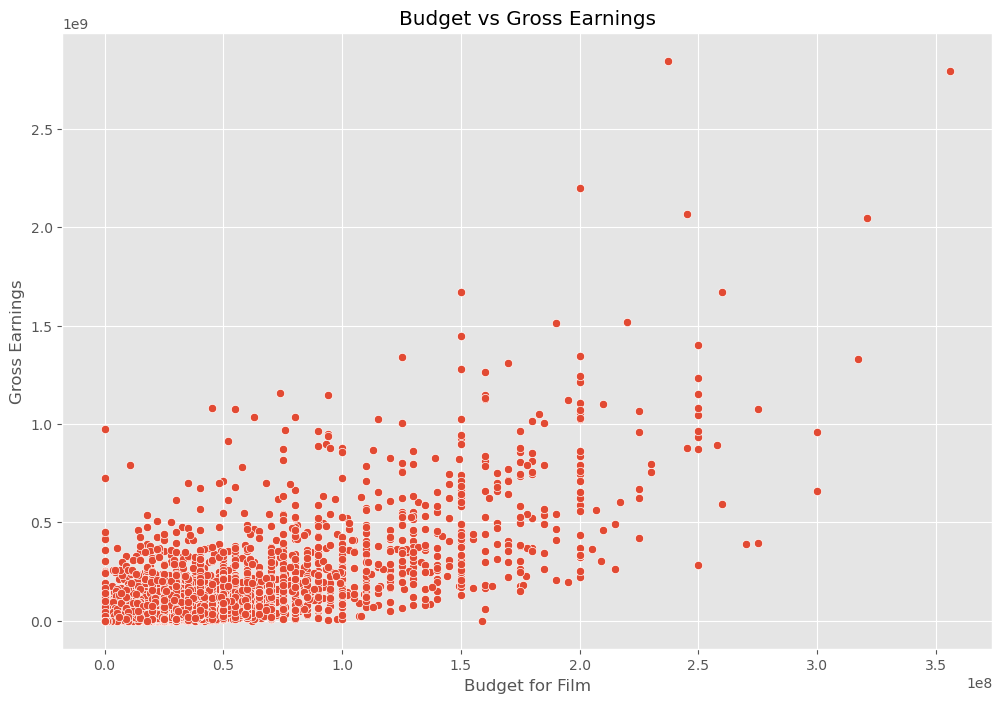

In [12]:
# Scatter plot with budget vs gross
sns.scatterplot(data=df, x='budget', y='gross')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [13]:
df.sort_values('gross', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1990,1990-01-26,4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,1989-04-14,5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0.000000e+00,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,1989-04-07,6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0.000000e+00,Trans World Entertainment (TWE),89
1601,My Twentieth Century,NaN,Comedy,1990,1990-01-13,7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104


In [14]:
df.sort_values('budget', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,2017-12-15,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1.332699e+09,Walt Disney Pictures,152
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,2007-05-25,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,9.609965e+08,Walt Disney Pictures,169
7066,Justice League,PG-13,Action,2017,2017-11-17,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,6.579270e+08,Warner Bros.,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,One False Move,R,Crime,1992,1992-05-08,7.1,11000,Carl Franklin,Billy Bob Thornton,Bill Paxton,United States,0,1.543112e+06,IRS Media,105
2136,Unlawful Entry,R,Crime,1992,1992-06-26,6.3,15000,Jonathan Kaplan,George Putnam,Kurt Russell,Japan,0,5.713872e+07,Largo Entertainment,111
2130,Sidekicks,PG,Action,1993,1993-04-30,5.1,8000,Aaron Norris,Lou Illar,Chuck Norris,United States,0,1.718039e+07,Gallery Films,101
5916,Martha Marcy May Marlene,R,Drama,2011,2011-12-21,6.9,50000,Sean Durkin,Sean Durkin,Elizabeth Olsen,United States,0,4.778439e+06,Fox Searchlight Pictures,102


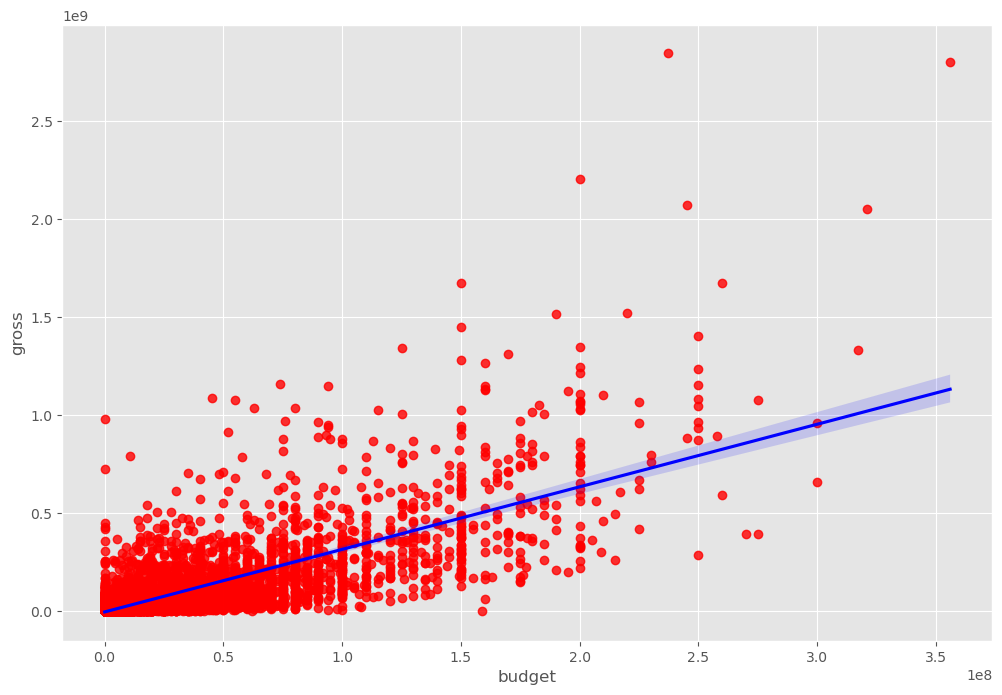

In [15]:
#Plot budget vs gross using regression plot:
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'color': 'red'}, line_kws={'color':'blue'})
plt.show()

In [16]:
#Start looking at correlation
df.corr(numeric_only=True, method='pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.398387,0.306984,0.268372,0.244339,1.000000


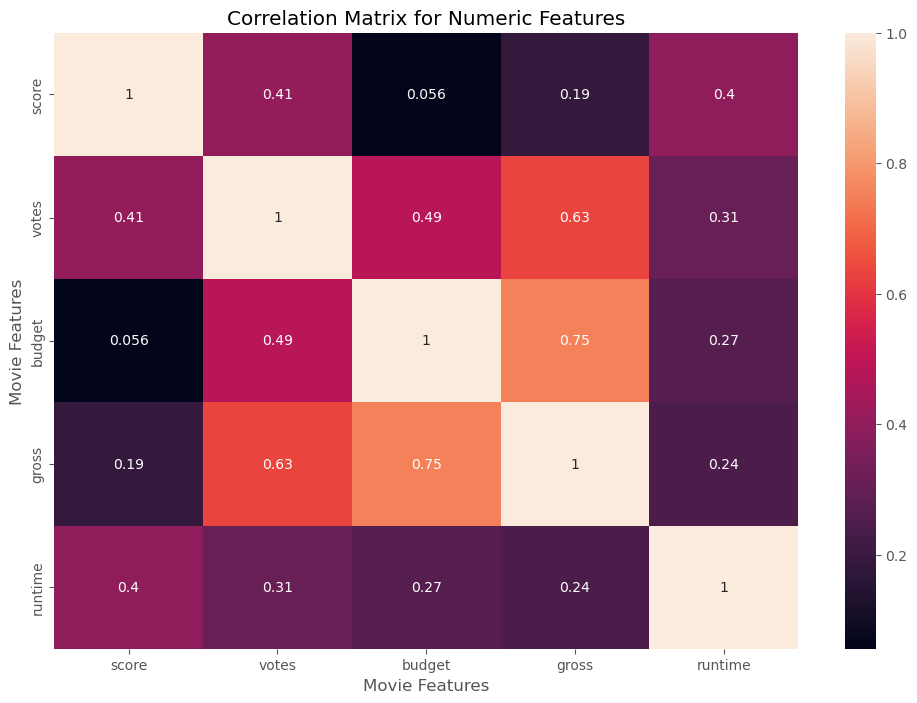

In [17]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98


In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,0,1980-06-13,8.4,927000,2589,4014,1047,54,19000000,46998772.0,2319,146
1,5573,6,1,0,1980-07-02,5.8,65000,2269,1632,327,55,4500000,58853106.0,731,104
2,5142,4,0,0,1980-06-20,8.7,1200000,1111,2567,1745,55,18000000,538375067.0,1540,124
3,286,4,4,0,1980-07-02,7.7,221000,1301,2000,2246,55,3500000,83453539.0,1812,88
4,1027,6,4,0,1980-07-25,7.3,108000,1054,521,410,55,6000000,39846344.0,1777,98


In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98


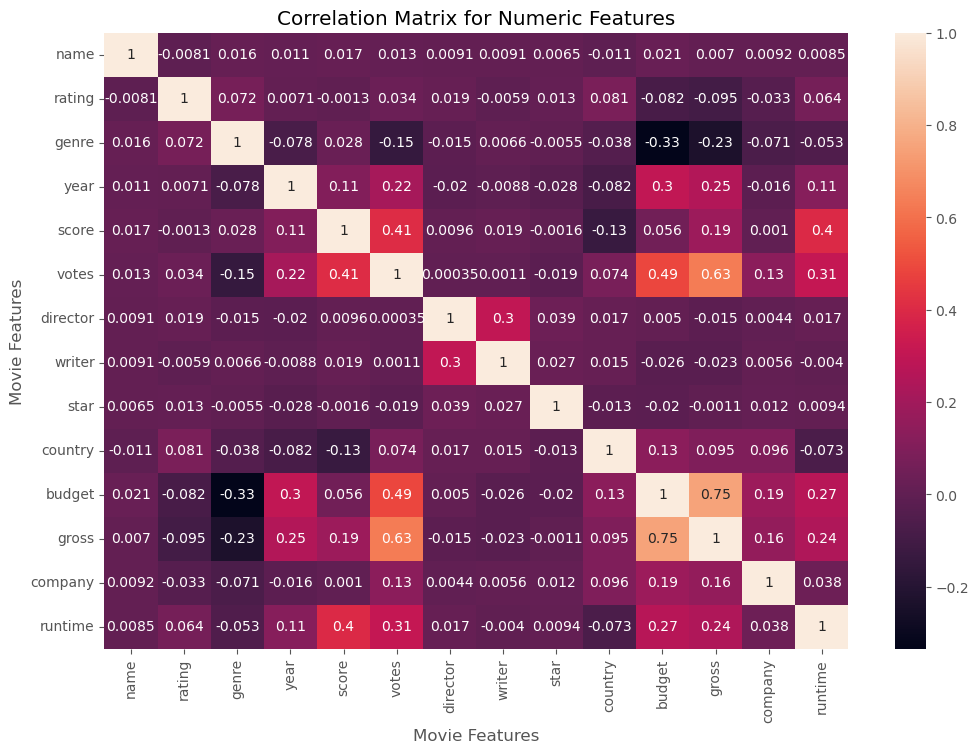

In [21]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011134,0.003816,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,0.007054,0.000915,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.077550,-0.075206,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,0.011134,0.007054,-0.077550,1.000000,0.892556,0.105601,0.217856,-0.020439,-0.008807,-0.027576,-0.082274,0.299603,0.254686,-0.016109,0.114737
released,0.003816,0.000915,-0.075206,0.892556,1.000000,0.102120,0.198318,-0.018369,-0.004975,-0.024874,-0.050348,0.277858,0.235541,0.000118,0.147285
score,0.017097,-0.001314,0.027965,0.105601,0.102120,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.398387
votes,0.013038,0.033743,-0.145296,0.217856,0.198318,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984
director,0.009079,0.019483,-0.015258,-0.020439,-0.018369,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,-0.008807,-0.004975,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.013405,-0.005477,-0.027576,-0.024874,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418


In [29]:
pd.set_option("display.max_rows", None)
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011134
      released    0.003816
dtype: float64

In [30]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

In [31]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation.head()

gross     votes     0.632870
votes     gross     0.632870
budget    gross     0.750157
gross     budget    0.750157
released  year      0.892556
dtype: float64

In [26]:
# Votes and budget have the highest correlation to gross earnings
#Company has low correlation
pd.set_option('display.max_rows', 20)